In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm 

In [2]:
# Loading the dataset 
transformation = transforms.Compose([transforms.ToTensor() , transforms.Normalize([0.5071, 0.4867, 0.4408],[0.2675, 0.2565, 0.2761])])

train_dataset = datasets.CIFAR100(root='./data',transform=transformation,train=True,download=True)
test_dataset = datasets.CIFAR100(root='./data',transform=transformation,train=False,download=True)

train_loader = DataLoader(train_dataset,batch_size=256,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=1000)

In [3]:
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=3, padding=1), 
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                         

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                         

    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                         

    # Now a normal Convulational layer.
    nn.Flatten(),                               
    nn.Linear(4096, 2148),
    nn.ReLU(),
    nn.Linear(2148, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 100),                       
)

In [4]:
# Train the model 
device = ("cude" if torch.cuda.is_available() else "cpu")
total_size = len(train_loader)*5
optimizer = optim.Adam(model.parameters(),lr=0.001)
total = 0 

model.train()
with tqdm(total=total_size) as taskbar :
    for epoch in range(5) :
        for x, y in train_loader : 
            x , y = x.to(device) , y.to(device)
            optimizer.zero_grad()
            y_pred = model(x)
            loss = nn.CrossEntropyLoss()(y_pred,y)
            loss.backward()
            optimizer.step()
            taskbar.update(1)
            if total % 100 == 0 :
                print(f"Loss after epochs {total} : {loss}")
            total += 1 

  0%|          | 0/980 [00:00<?, ?it/s]

Loss after epochs 0 : 4.599104404449463
Loss after epochs 100 : 3.509572744369507
Loss after epochs 200 : 3.288329839706421
Loss after epochs 300 : 2.849438428878784
Loss after epochs 400 : 2.584779977798462
Loss after epochs 500 : 2.5366506576538086
Loss after epochs 600 : 1.9759973287582397
Loss after epochs 700 : 2.2160611152648926
Loss after epochs 800 : 1.8875600099563599
Loss after epochs 900 : 1.83014976978302


In [5]:
# Testing the dataset 
model.eval()
correct = 0 
total = 0 
with torch.no_grad() : 
    for x , y in test_loader : 
        x , y = x.to(device) , y.to(device)
        y_pred = torch.argmax(model(x),dim=-1)
        correct += (y_pred == y).sum().item()
        total += y.size(0)
    print(f"Accuracy = {(100*(correct/total)):.2f}%")

Accuracy = 43.08%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


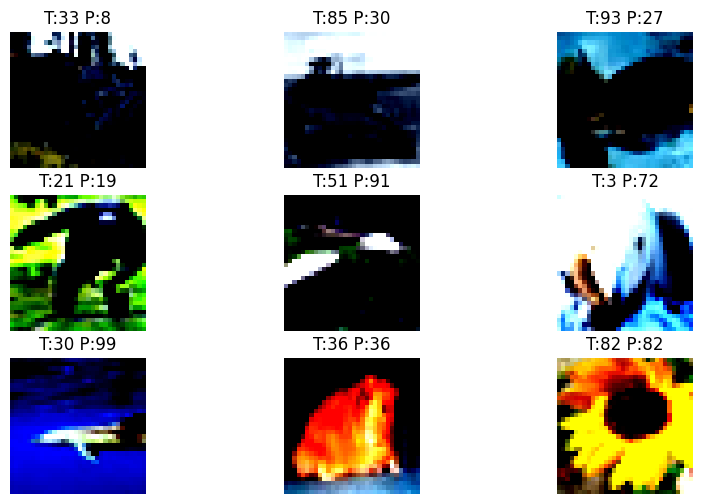

In [6]:
# Check on few example 
import numpy as np 

iter_test = iter(test_loader)
x , y = next(iter_test)
preds = torch.argmax(model(x),dim=-1)
idx = np.random.randint(0,1000,size=9)
plt.figure(figsize=(10, 6))
for i in range(9) : 
    plt.subplot(3,3,i+1)
    img = np.transpose(x[idx[i]].detach().numpy(),(1,2,0))
    plt.imshow(img)
    plt.title(f"T:{y[idx[i]].item()} P:{preds[idx[i]].item()}")
    plt.axis('off')
plt.show()